In [1]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append('../')
from sklearn.metrics import mean_squared_error
import re
import numpy as np

In [2]:
from core.models import rUNet
from core.utils.inference import inference_phase_rUNet_plot_notebook
from core.utils.data import define_dataset, select_dist

In [3]:
from functools import partial

In [4]:
import torch

In [5]:
%matplotlib inline

In [6]:
regex = re.compile(r'\d+')

In [7]:
saved_models = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/'

In [8]:
root_path = partial(os.path.join, saved_models)

In [9]:
data_folder = ('/storage/yw18581/data/dataset/')

In [10]:
model_names = os.listdir(saved_models)

In [11]:
def get_fnames(coeff, prefix='Trained'):
    idx_coef = 6 if prefix=='Trained' else 4
    idx_epoch = 5 if prefix =='Trained' else 3
    f_list = []
    epochs = []
    for fname in model_names:
        if fname.startswith(prefix):
            if regex.findall(fname.split("_")[idx_coef])[1]==str(coeff):
                epoch = int(regex.findall(fname.split("_")[idx_epoch])[0]) 
                epochs.append(epoch)
                if int(regex.findall(fname.split("_")[idx_epoch])[0])==epoch:
                    f_list.append(fname)
    
    return np.array(f_list)[np.argsort(epochs)], np.sort(epochs)

In [12]:
training_dist = [2,4,10,20,25,35]
unseen_dist = [1,3,15,30]

In [13]:
selected_distances = select_dist(unseen_dist, data_folder)

In [14]:
data_loaders_mask, data_length_mask = define_dataset(data_folder, batch_size=16,
                                                    include_list=selected_distances,
                                                     alldata=False)

In [15]:
data_length_mask

{'train': 2261, 'val': 565, 'test': 706}

In [16]:
def predict_coef_epoch(coeff, epoch):
    filelist, epochs = get_fnames(coeff)
    model_fname = filelist[int(np.argwhere(epochs==epoch)[0])]
    print(model_fname)
    torch.cuda.empty_cache()
    model = rUNet(out_size=1)
    checkpoint = torch.load(root_path(model_fname))['model_state_dict']
    #print(checkpoint)
    model.load_state_dict(checkpoint)
    
    print('Checkpoint loaded')
    inference_phase_rUNet_plot_notebook(model, data_loaders_mask, data_length_mask,
                                       batch_size=16, stop=1, test=True)

    return 

Trained_rUNet_pytorch_6positions_dataset_30epochs_0.5coeff_mask.pkl
Checkpoint loaded


batch 1
1: true_dist: 1, pred_dist: [1.2815726]


2: true_dist: 15, pred_dist: [15.114014]


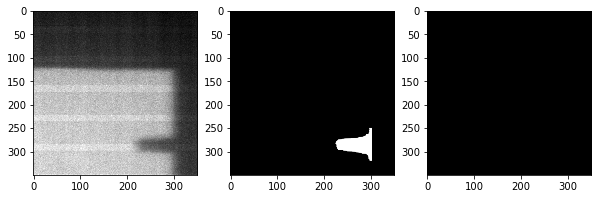

3: true_dist: 15, pred_dist: [15.243334]


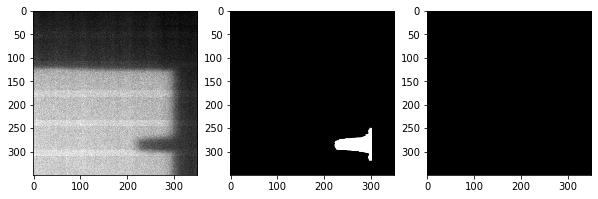

4: true_dist: 1, pred_dist: [1.2436721]


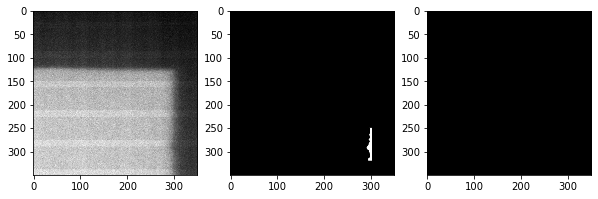

5: true_dist: 3, pred_dist: [3.0818937]


6: true_dist: 1, pred_dist: [1.3113749]


7: true_dist: 15, pred_dist: [15.240757]


8: true_dist: 15, pred_dist: [15.263107]


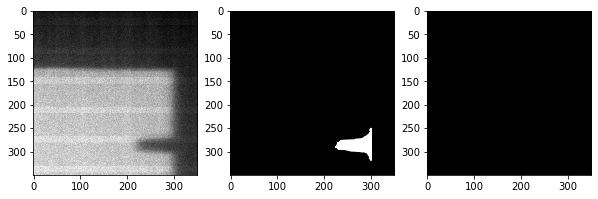

9: true_dist: 30, pred_dist: [30.822882]


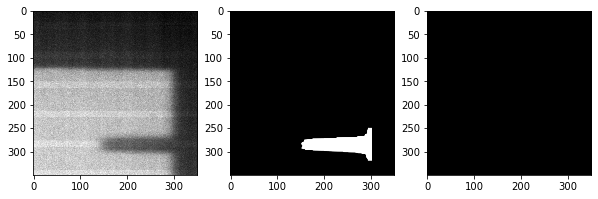

10: true_dist: 15, pred_dist: [15.273913]


11: true_dist: 30, pred_dist: [30.448082]


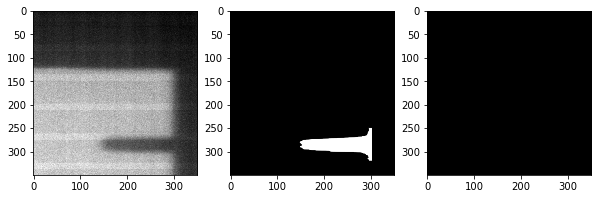

12: true_dist: 3, pred_dist: [2.9016209]


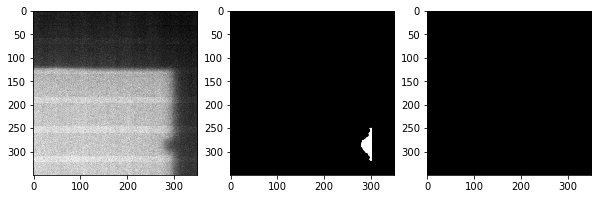

13: true_dist: 30, pred_dist: [30.619778]


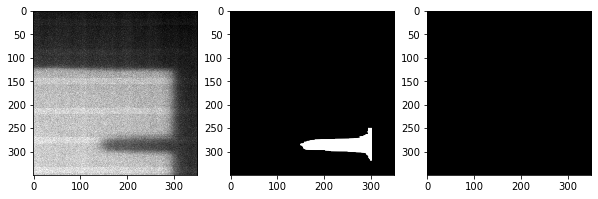

14: true_dist: 30, pred_dist: [30.490065]


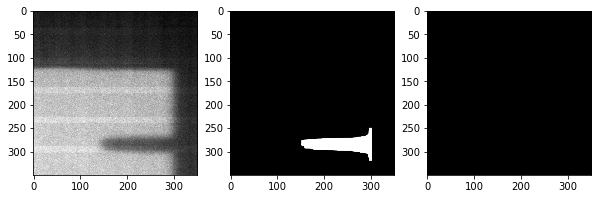

15: true_dist: 15, pred_dist: [15.335916]


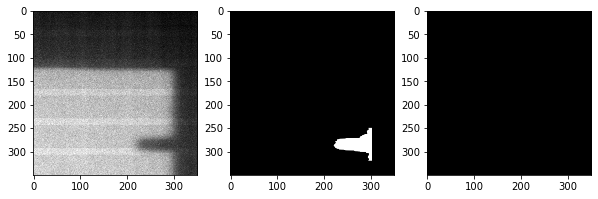

16: true_dist: 15, pred_dist: [15.259155]


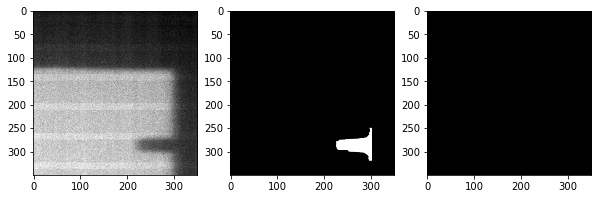

batch 2
1: true_dist: 1, pred_dist: [1.1942737]


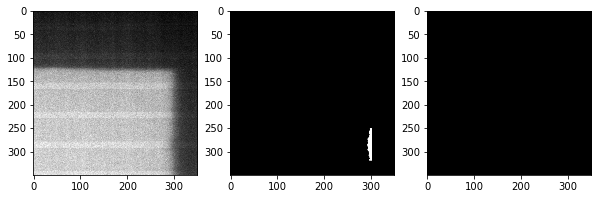

2: true_dist: 30, pred_dist: [30.76157]


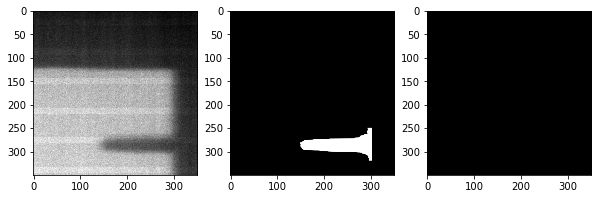

3: true_dist: 1, pred_dist: [1.5339886]


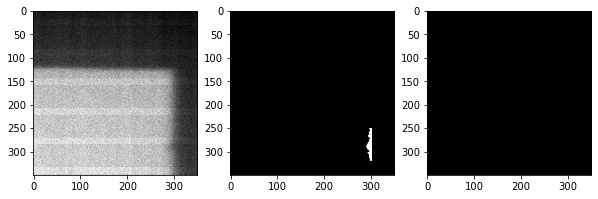

4: true_dist: 30, pred_dist: [30.505438]


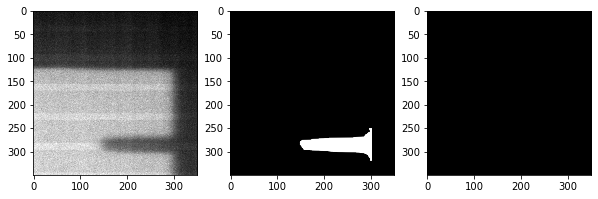

5: true_dist: 3, pred_dist: [2.9710984]


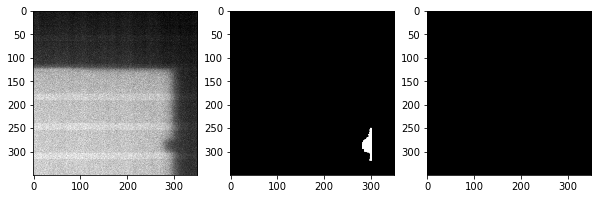

6: true_dist: 1, pred_dist: [1.294173]


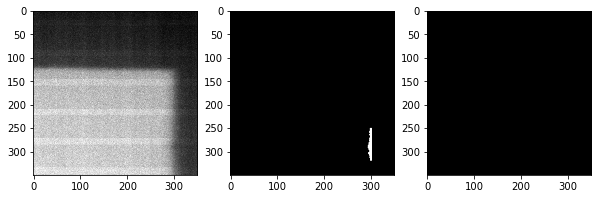

7: true_dist: 1, pred_dist: [1.3068383]


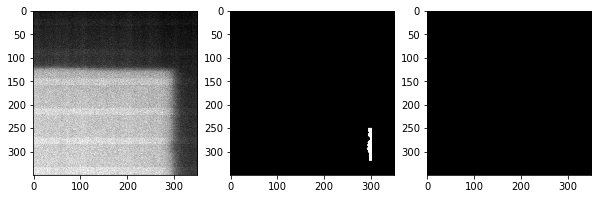

8: true_dist: 3, pred_dist: [3.0894654]


9: true_dist: 3, pred_dist: [2.9001608]


10: true_dist: 1, pred_dist: [1.2569649]


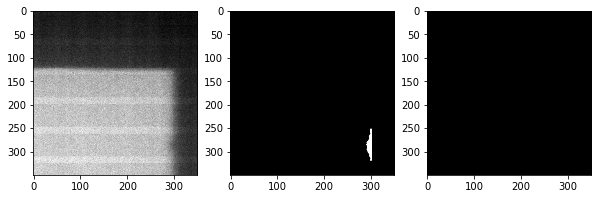

11: true_dist: 15, pred_dist: [15.30304]


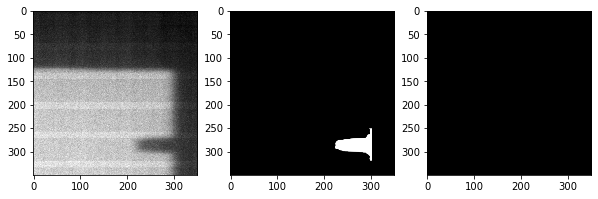

12: true_dist: 30, pred_dist: [30.610287]


13: true_dist: 1, pred_dist: [1.298771]


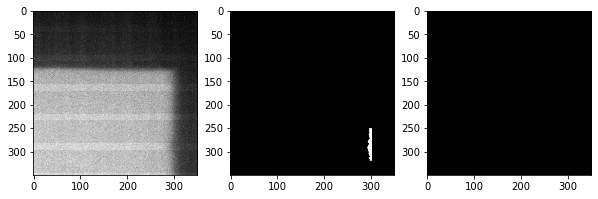

14: true_dist: 30, pred_dist: [30.555132]


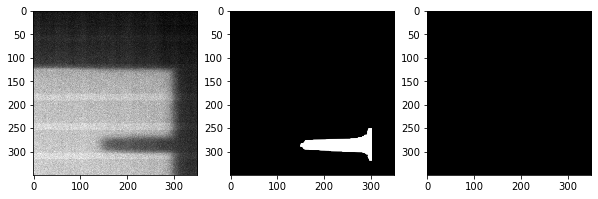

15: true_dist: 3, pred_dist: [2.8866007]


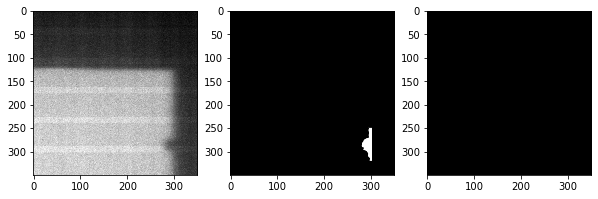

16: true_dist: 3, pred_dist: [2.923608]


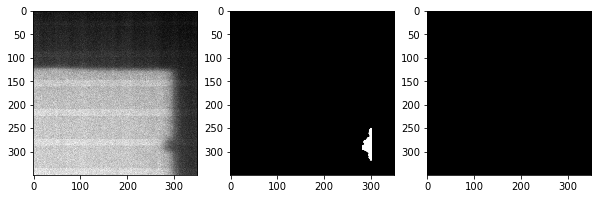

In [17]:
predict_coef_epoch(5, 30)

In [18]:
filelist, epochs = get_fnames(5)
model_fname = filelist[int(np.argwhere(epochs==10)[0])]
print(model_fname)
torch.cuda.empty_cache()
model = rUNet(out_size=1)
checkpoint = torch.load(os.path.join('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_0.50_multi_loss',model_fname))['model_state_dict']
#checkpoint = torch.load(root_path(model_fname))['model_state_dict']
#print(checkpoint)
model.load_state_dict(checkpoint)

Trained_rUNet_pytorch_6positions_dataset_10epochs_0.5coeff_mask.pkl


<All keys matched successfully>

In [19]:
from tqdm.notebook import tqdm

In [20]:
device = torch.device("cuda:{}".format(0) if torch.cuda.is_available() else 'cpu')

In [21]:
model.eval();
model.to(device);

In [22]:
torch.cuda.empty_cache()

1: true_dist: 15, pred_dist: [15.065878]


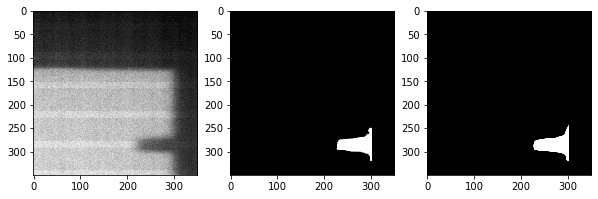

2: true_dist: 15, pred_dist: [15.170513]


3: true_dist: 3, pred_dist: [3.1656284]


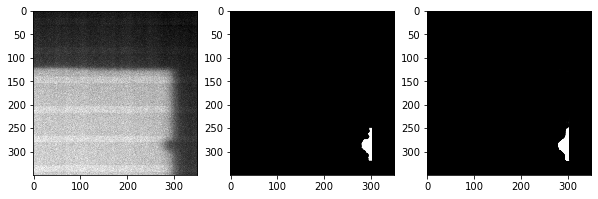

4: true_dist: 3, pred_dist: [2.9625642]


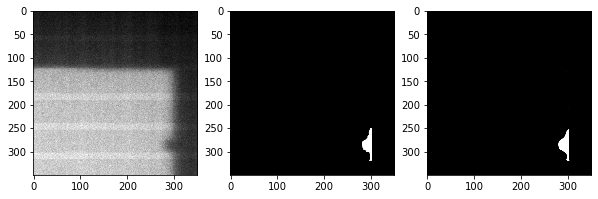

5: true_dist: 15, pred_dist: [15.2275095]


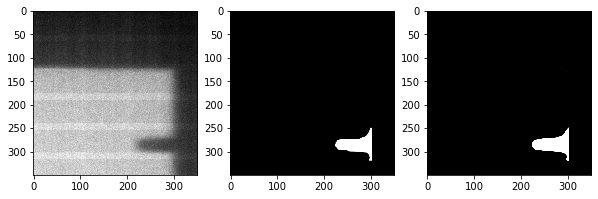

6: true_dist: 3, pred_dist: [3.2318933]


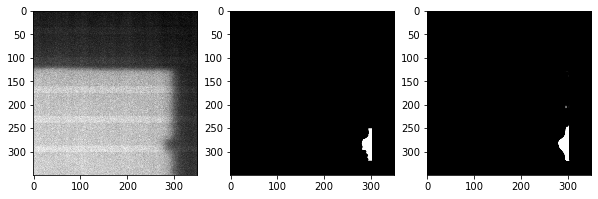

7: true_dist: 1, pred_dist: [1.4059647]


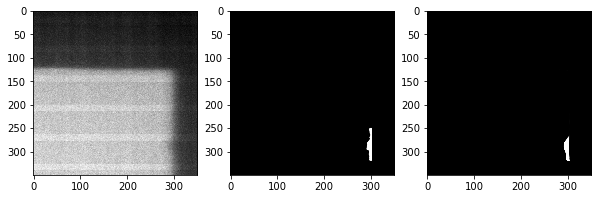

8: true_dist: 15, pred_dist: [15.067247]


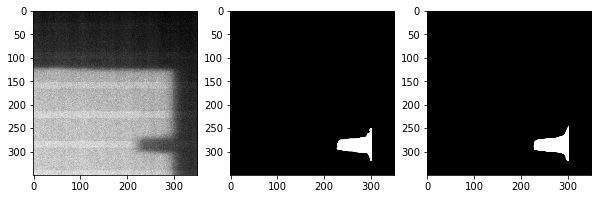

9: true_dist: 3, pred_dist: [2.801348]


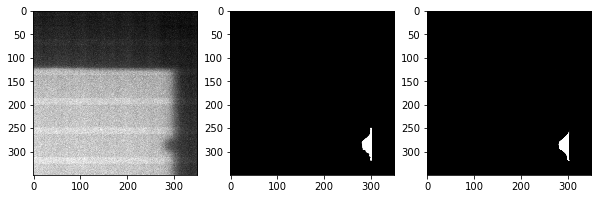

10: true_dist: 1, pred_dist: [1.3379673]


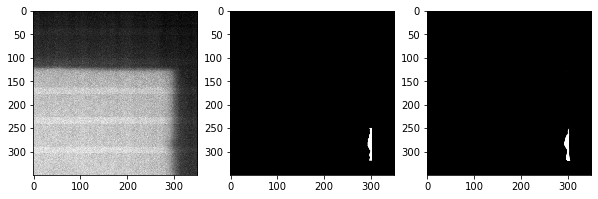

11: true_dist: 3, pred_dist: [3.247308]


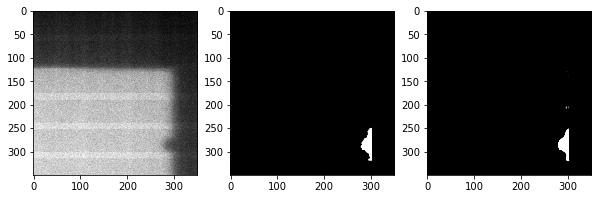

12: true_dist: 1, pred_dist: [1.3962861]


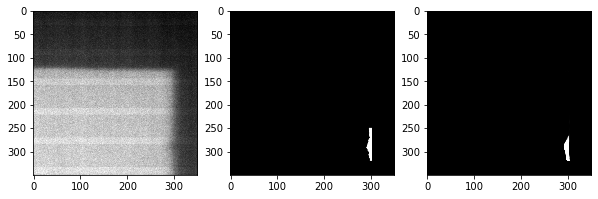

13: true_dist: 30, pred_dist: [29.708765]


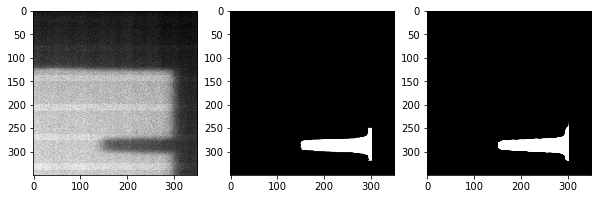

14: true_dist: 3, pred_dist: [2.900466]


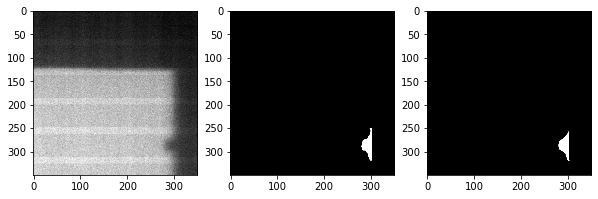

15: true_dist: 1, pred_dist: [1.4733752]


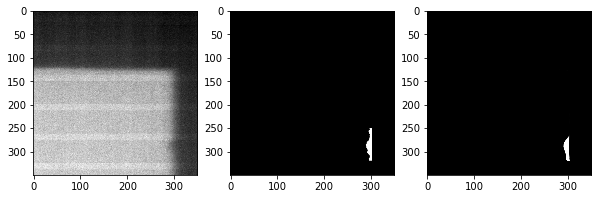

16: true_dist: 1, pred_dist: [1.302605]


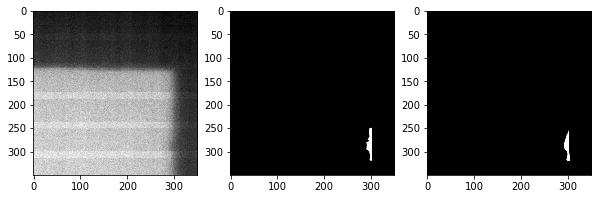

1: true_dist: 3, pred_dist: [3.7373424]


2: true_dist: 3, pred_dist: [2.9266217]


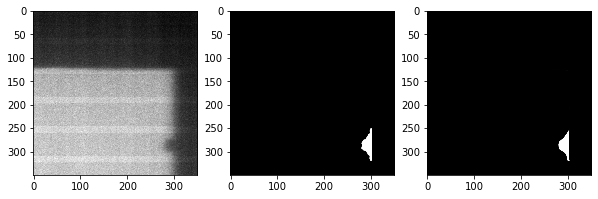

3: true_dist: 30, pred_dist: [29.510345]


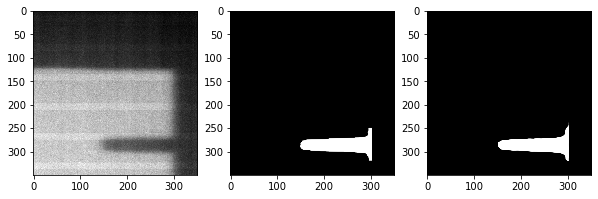

4: true_dist: 3, pred_dist: [2.9840558]


5: true_dist: 15, pred_dist: [14.959779]


6: true_dist: 1, pred_dist: [1.4530476]


7: true_dist: 1, pred_dist: [1.4766034]


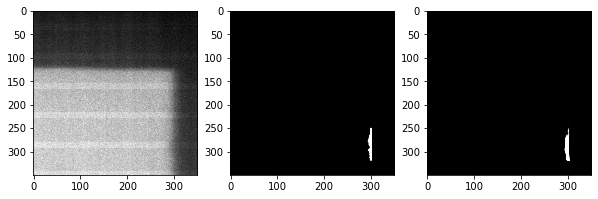

8: true_dist: 3, pred_dist: [2.8657994]


9: true_dist: 3, pred_dist: [2.8866055]


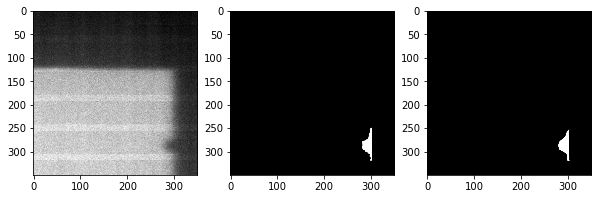

10: true_dist: 15, pred_dist: [15.074529]


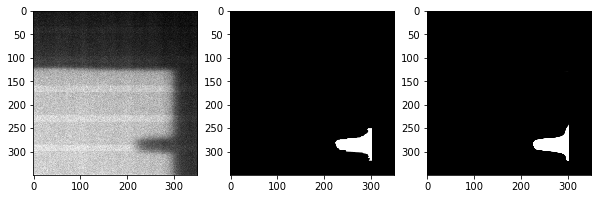

11: true_dist: 30, pred_dist: [30.082098]


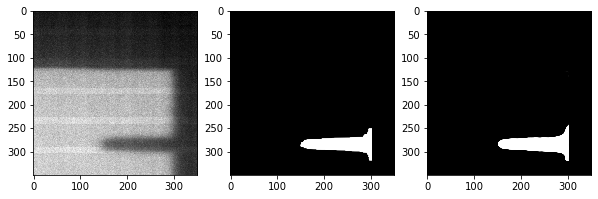

12: true_dist: 15, pred_dist: [15.043669]


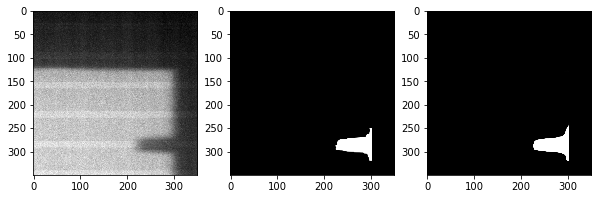

13: true_dist: 15, pred_dist: [15.084233]


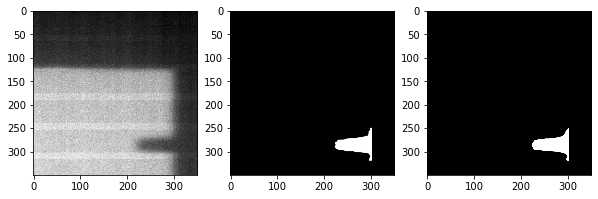

14: true_dist: 3, pred_dist: [2.5730906]


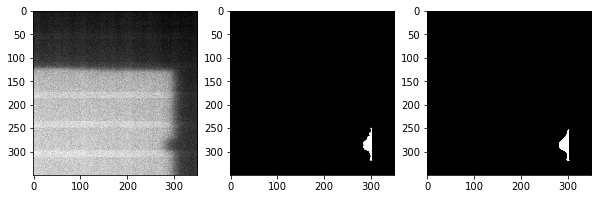

15: true_dist: 30, pred_dist: [29.805649]


16: true_dist: 15, pred_dist: [15.076821]


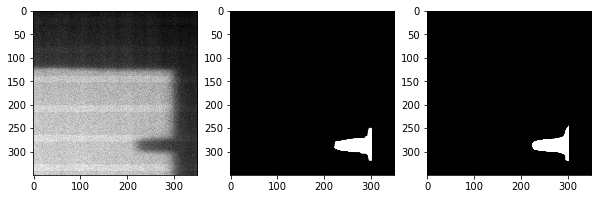

In [23]:
for i, batch in tqdm(enumerate(data_loaders_mask['test']), total=data_length_mask['test']//16,
                    desc='Batch'):
    true_images, true_masks, true_dists = batch['image'], batch['mask'], batch['dist']
    pred_masks, pred_dists = model(true_images.float().to(device))
    for j, (img, tr_msk, tr_dist, pr_msk, pr_dist) in enumerate(zip(true_images,
                                                                   true_masks, 
                                                                   true_dists,
                                                                   pred_masks.cpu().detach().numpy(),
                                                                   pred_dists.cpu().detach().numpy())):
        print("{}: true_dist: {}, pred_dist: {}".format(j+1, tr_dist, pr_dist))
        
        f = plt.figure(figsize=(10,5))
        f.add_subplot(1,3,1)
        plt.imshow(img[0,...],cmap='gray')
        f.add_subplot(1,3,2)
        plt.imshow(tr_msk[0,...], cmap='gray')
        f.add_subplot(1,3,3)
        plt.imshow(pr_msk[0,...], cmap='gray')
        plt.show(block=True)
    if i==1:
        break